In [1]:
#importing libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from statsmodels.stats import weightstats as stests
data= pd.read_csv("https://bit.ly/DSCoreAutolibDataset")
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [2]:
data.shape

(16085, 13)

In [3]:
data.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [4]:
len(data['Postal code'].unique())

104

In [5]:
data.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.


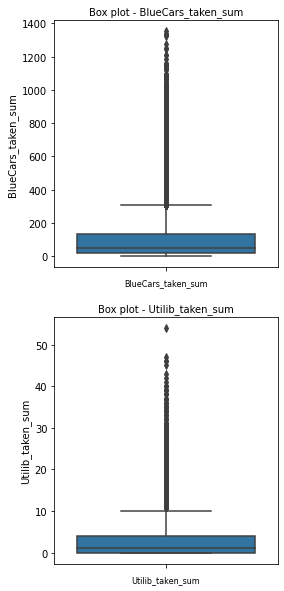

In [6]:
#Checking outliers columns
col_names = ['BlueCars_taken_sum', 'Utilib_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [7]:
# Remove outliers from the columms using outlier function 
def remove_outliers(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    #return df 

for col in col_names:
    remove_outliers(data,col)

In [8]:
#Checking for null values
data.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

**Hypothesis**

In [9]:
#H0:There is no difference between the blues taken and blue cars returned on a weekend for a specific postal code
#H1:There is a difference between the blues taken and blue cars returned on a weekend for a specific postal code
#setting the alpha value
alpha=0.05

In [10]:
data_weekend = data[data['day_type']=='weekend']
data_weekend.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,88794.686633,1434.694781,5.500771,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,20.819324,0.500054,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,1318.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1440.000000,5.000000,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,6.000000,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,1440.000000,6.000000,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [11]:
data_weekend.groupby('Postal code')
#stratified sample
strat = data.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.01))
strat

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
86,75001,3/31/2018,1440,5,weekend,192,193,3,3,12,12,27,27
60,75001,3/5/2018,1440,0,weekday,102,103,1,1,12,12,21,19
238,75002,3/27/2018,1440,1,weekday,168,165,6,6,4,4,45,46
178,75002,1/23/2018,1439,1,weekday,130,131,6,6,8,7,33,35
386,75003,3/19/2018,1440,0,weekday,190,188,10,8,6,7,50,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,95100,3/19/2018,1440,0,weekday,23,20,0,0,0,0,0,0
15880,95870,4/21/2018,1440,5,weekend,22,12,0,0,0,0,0,0
15785,95870,1/13/2018,1440,5,weekend,13,17,0,0,0,0,0,0
15976,95880,2/17/2018,1440,5,weekend,23,19,0,0,1,2,0,0


In [12]:
BlueCars_taken = np.array(list(strat['BlueCars_taken_sum']))
BlueCars_returned = np.array(list(strat['BlueCars_returned_sum']))
BlueCars_returned

array([ 193,  103,  165,  131,  188,  174,  173,  188,  300,  248,  261,
        252,  258,  254,  488,  348,  298,  410,  273,   35,  386,  561,
        445,  448,  544,  550,  485,  614, 1119,  807,  860,  662,  714,
        867,  389,  363,  509,  474,  390,  414,   12,    8,   12,   15,
         25,   58,   33,   37,   51,   38,   14,    6,   11,   14,    8,
          7,  127,  335,  331,  356,   20,   29,   84,   90,  242,  275,
         80,   74,  135,  210,   16,   23,   50,   79,   70,   65,   55,
         42,   93,   67,   58,   42,   47,   53,  106,  114,   49,   74,
         28,   37,   49,   20,    8,    7,  229,  194,   52,   60,   60,
         71,   37,   35,   16,   15,   20,   15,   20,   29,   30,   29,
         25,   12,   13,  114,   67,   19,   12,    4,   11,  181,   99,
         98,  183,  104,   99,   71,   93,  122,  106,   47,   43,   36,
         16,    2,    1,   41,   64,    5,   31,   19,   62,   37,   19,
         21,   12,   20,    1,   13,   16,   28,   

In [13]:
Diff = BlueCars_taken - BlueCars_returned

In [14]:
stats.zscore(Diff, )

array([-0.04130006, -0.04130006,  0.32501353, -0.04130006,  0.23343513,
        0.23343513,  0.78290551, -0.86550563, -1.50655441,  0.8744839 ,
        0.14185673,  0.23343513,  1.0576407 ,  0.23343513,  0.14185673,
       -2.88023035,  0.8744839 , -2.23918158, -3.15496554,  1.97342466,
        3.43867901,  1.42395428, -0.40761365, -0.40761365, -1.6897112 ,
       -0.86550563,  0.8744839 , -2.51391677, -7.36757179, -3.06338715,
       -0.59077044,  0.59974871, -1.23181922,  0.59974871, -2.05602479,
        1.42395428,  0.8744839 ,  1.97342466, -1.41497601,  1.69868947,
        0.05027834, -0.04130006, -0.04130006,  0.41659192,  0.14185673,
       -0.59077044, -0.04130006,  0.23343513,  0.32501353, -0.04130006,
       -0.04130006,  0.41659192, -0.31603525, -0.49919204, -0.13287846,
        0.05027834,  0.78290551,  0.50817032,  3.16394382, -1.32339761,
        0.41659192, -0.13287846, -0.13287846, -0.22445685,  1.51553268,
        0.8744839 ,  0.14185673, -0.13287846,  0.50817032,  0.50

In [15]:
ztest ,pval = stests.ztest(Diff)
ztest ,pval

(-0.7163560109781673, 0.4737715496388303)

In [16]:
if pval>0.05:
    print("P-Value = " +str(pval)+ " Hence We fail to reject the null hypotheis and we conclude that there is no difference between the blue cars taken and blue cars returned on a weekend for a specific postal code")
else:
    print(("P-Value = " +str(pval)+ " Hence we reject the null hypothesis and we conclude that there is a difference between the blue cars taken and blue cars returned on a weekend for a specific postal code"))

P-Value = 0.4737715496388303 Hence We fail to reject the null hypotheis and we conclude that there is no difference between the blue cars taken and blue cars returned on a weekend for a specific postal code


In [17]:
#cars taken at point A as compared to point B

In [18]:
#H0: There are more cars picked at point 75001 as opposed to point 75002
